<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/5_Aprendizaje_supervisado/1_Taller_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Regresión Lineal**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

- Edgardo Sanchez

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_PCA_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

Hoy, 29 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

Contexto: Tu Primer Proyecto en AutoAnalitica 📈 🚗

¡Felicitaciones! Has sido contratado como Científico de Datos Junior en AutoAnalitica, una firma de consultoría líder que asesora a grandes concesionarios de autos usados en el país.

Tu primer proyecto es construir un prototipo de modelo de pricing inteligente. La gerencia de uno de nuestros clientes principales está preocupada porque sus agentes de ventas tasan los vehículos que reciben basándose únicamente en su intuición, lo que genera precios inconsistentes y pérdida de oportunidades.

El objetivo: Desarrollar un modelo de machine learning que pueda predecir el precio de venta justo de un automóvil basándose en sus características (antigüedad, kilómetros recorridos, tipo de combustible, etc.). Esta herramienta no busca reemplazar al vendedor, sino darle un precio base, basado en datos, para hacer ofertas más rápidas, justas y competitivas. Tu misión hoy es construir el primer modelo base y evaluar su precisión.

# 1. Importar librerías necesarias

In [30]:
### TU CÓDIGO AQUÍ ###
import os

# Librerías para manipulación y análisis de datos
import pandas as pd
import numpy as np

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelamiento
import statsmodels.api as sm  # Para el enfoque econométrico (inferencia)
from sklearn.datasets import fetch_california_housing # Dataset
from sklearn.model_selection import train_test_split # Para dividir los datos
from sklearn.linear_model import LinearRegression # Modelo de ML (predicción)
from sklearn.metrics import mean_squared_error, r2_score # Métricas de evaluación

# Pruebas de Supuestos
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Mejorar visualización de dataframes y gráficos

In [31]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Cargar el dataset `car data.csv`.

- Car_Name: The name of each car.
- Year: The year that the car was bought.
- Selling_Price: The price that the car has at the sale time (thousands of USD). Esta es la variable objetivo.
- Present_Price: The price that car has right now (thousands of USD).
- Kms_Driven: The number of kilometers that the car is driven.
- Fuel_Type: The type of fuel that the car consumes.
- Seller_Type: The type of car seller: individual or dealer.
- Transmission: The type of the car gear: manual or automatic.
- Owner: The number of previous owners of the car.

In [32]:
# Carga el dataset
### TU CÓDIGO AQUÍ ###
from google.colab import drive
drive.mount('/content/drive')

path="/content/drive/MyDrive/datasets"

# Establecer el directorio
os.chdir(path)

# Leer el archivo CSV
df = pd.read_csv('car data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Mostrar las primeras filas para entender la estructura
### TU CÓDIGO AQUÍ ###
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 3. Análisis Exploratorio de Datos (EDA) y preparación de datos

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [35]:
# Revisa si hay filas duplicadas y elíminalas
### TU CÓDIGO AQUÍ ###
duplicados = df.duplicated().sum()
df = df.drop_duplicates()

In [36]:
# Muestras las estadísticas descriptivas
### TU CÓDIGO AQUÍ ###
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.00,299.00,299.00,299.00,299.00
mean,"2,013.62",4.59,7.54,"36,916.75",0.04
std,2.90,4.98,8.57,"39,015.17",0.25
min,"2,003.00",0.10,0.32,500.00,0.00
25%,"2,012.00",0.85,1.20,"15,000.00",0.00
50%,"2,014.00",3.51,6.10,"32,000.00",0.00
75%,"2,016.00",6.00,9.84,"48,883.50",0.00
max,"2,018.00",35.00,92.60,"500,000.00",3.00


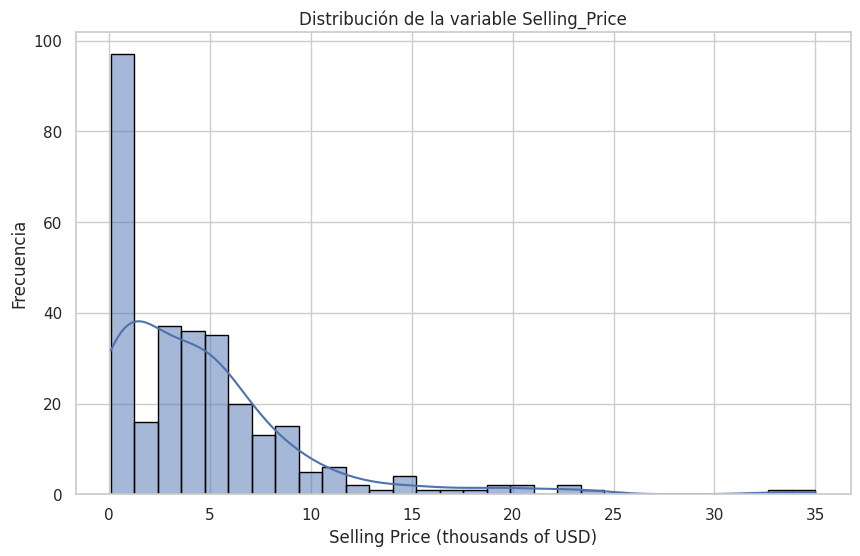

In [37]:
# Grafica un histograma para ver la distribución de la variable independiente "Selling_Price"
### TU CÓDIGO AQUÍ ###
sns.histplot(df['Selling_Price'], bins=30, edgecolor='black',kde=True)
plt.xlabel('Selling Price (thousands of USD)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable Selling_Price')
plt.show()

Escribe tus conclusiones aquí.

La distribución de la variable Selling_Price muestra que la mayoría de las barras se concentran hacia la izquierda del gráfico, lo que indica que la mayoría de los vehículos se venden a precios bajos. Esto significa que la mayor parte del inventario corresponde a autos usados de menor valor, posiblemente con más años de antigüedad o mayor kilometraje recorrido.

A medida que el precio aumenta, la frecuencia de los vehículos disminuye de forma considerable, lo que genera una cola larga hacia la derecha. Esta asimetría positiva refleja la existencia de pocos autos con precios elevados, que pueden corresponder a modelos más nuevos o con mejores condiciones generales. En conjunto, esta distribución sugiere que el mercado está dominado por vehículos de gama baja o media, mientras que los de gama alta son casos poco frecuentes.


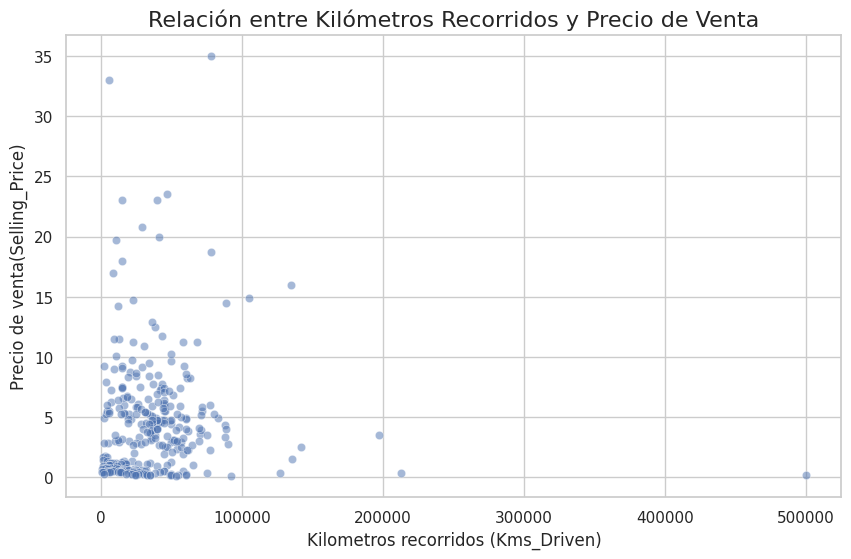

In [38]:
# Visualiza la relación entre 'Kms_Driven' y 'Selling_Price'
### TU CÓDIGO AQUÍ ###
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=df, alpha=0.5)
plt.title('Relación entre Kilómetros Recorridos y Precio de Venta', fontsize=16)
plt.xlabel('Kilometros recorridos (Kms_Driven)')
plt.ylabel('Precio de venta(Selling_Price)')
plt.show()

Basado en el gráfico, ¿qué tipo de relación observas? ¿Es lo que esperabas económicamente?

El gráfico de dispersión muestra que existe una **relación inversa** entre los kilómetros recorridos y el precio de venta de los vehículos. A medida que aumenta el kilometraje, el precio tiende a disminuir, lo cual es lógico ya que un mayor uso del auto implica más desgaste y menor valor de reventa.

Se observa una alta concentración de puntos en la zona inferior izquierda del gráfico, donde los autos con menos de 100.000 kilómetros presentan una gran variabilidad en precios, lo que indica que otros factores como el año, el tipo de combustible o el estado general del vehículo también influyen en el valor de venta. Por otro lado, los autos con kilometrajes muy altos (más de 200.000 kilómetros) tienden a tener precios bajos y similares, confirmando que el kilometraje es un factor importante en la depreciación del vehículo.

Sí, es lo que se esperaría desde un punto de vista económico. A medida que un vehículo acumula más kilómetros, su valor tiende a disminuir debido al desgaste natural de las piezas, al aumento en la probabilidad de fallas mecánicas y a la reducción de su vida útil restante. Este comportamiento refleja el proceso normal de depreciación de los bienes de capital: cuanto más se utiliza un activo, menor es su valor de mercado.

Por tanto, la relación negativa observada entre los kilómetros recorridos y el precio de venta es totalmente coherente con la lógica económica del mercado automotriz, donde los compradores están dispuestos a pagar más por vehículos con menos uso y en mejores condiciones generales.


In [39]:
# Crea la variable "Car_Age" que será la resta entre el año actual y el año del carro
### TU CÓDIGO AQUÍ ###
df['Car_Age'] = 2025 - df['Year']
df[['Year', 'Car_Age']].head()


,Year,Car_Age
0,2014,11
1,2013,12
2,2017,8
3,2011,14
4,2014,11


In [40]:
# Elimina la columna 'Car_Name' que no usaremos
### TU CÓDIGO AQUÍ ###
df = df.drop('Car_Name', axis = 1)

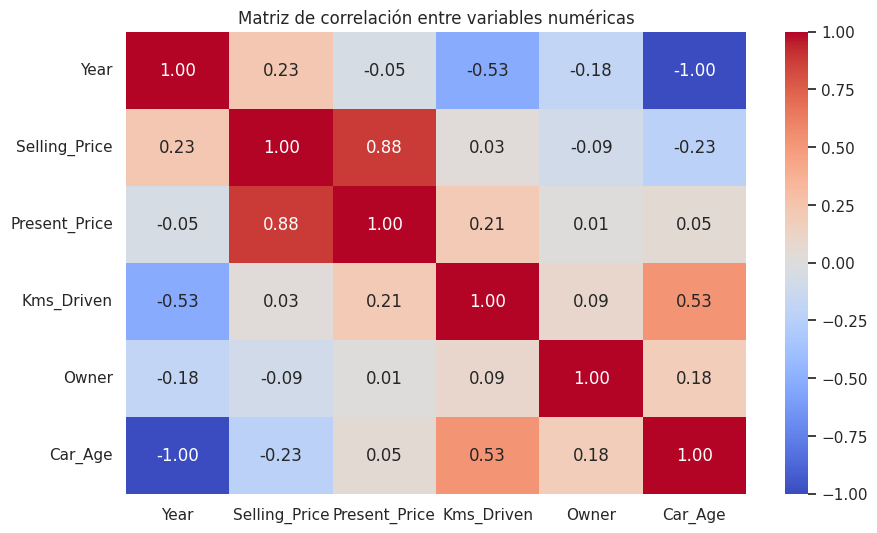

In [23]:
# Calcula la matriz de correlación para las variables numéricas y grafica el heatmap
### TU CÓDIGO AQUÍ ###
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

Escribe tus conclusiones aquí.

La matriz de correlación muestra varios patrones interesantes. La relación más fuerte y positiva se da entre Selling_Price y Present_Price, con un coeficiente de 0.88, lo que indica que el precio de venta de un automóvil está altamente asociado con su precio actual en el mercado. Esto es coherente, ya que los autos con un valor actual más alto tienden a venderse también a precios más altos.

Por otro lado, se observa una correlación negativa muy alta entre Year y Car_Age (-1.00), lo cual es lógico porque Car_Age se calculó directamente a partir del año del vehículo. Además, Car_Age tiene una correlación negativa moderada con Selling_Price (-0.23), lo que sugiere que los autos más antiguos tienden a venderse a precios menores, mientras que Year presenta una correlación positiva similar con el precio de venta. También se aprecia una relación positiva entre Kms_Driven y Car_Age (0.53), indicando que los vehículos más viejos generalmente tienen más kilometraje recorrido. En conjunto, estas relaciones confirman que el valor de un vehículo depende en gran medida de su año, su antigüedad y su precio actual, mientras que el número de propietarios y los kilómetros recorridos tienen un efecto más moderado.


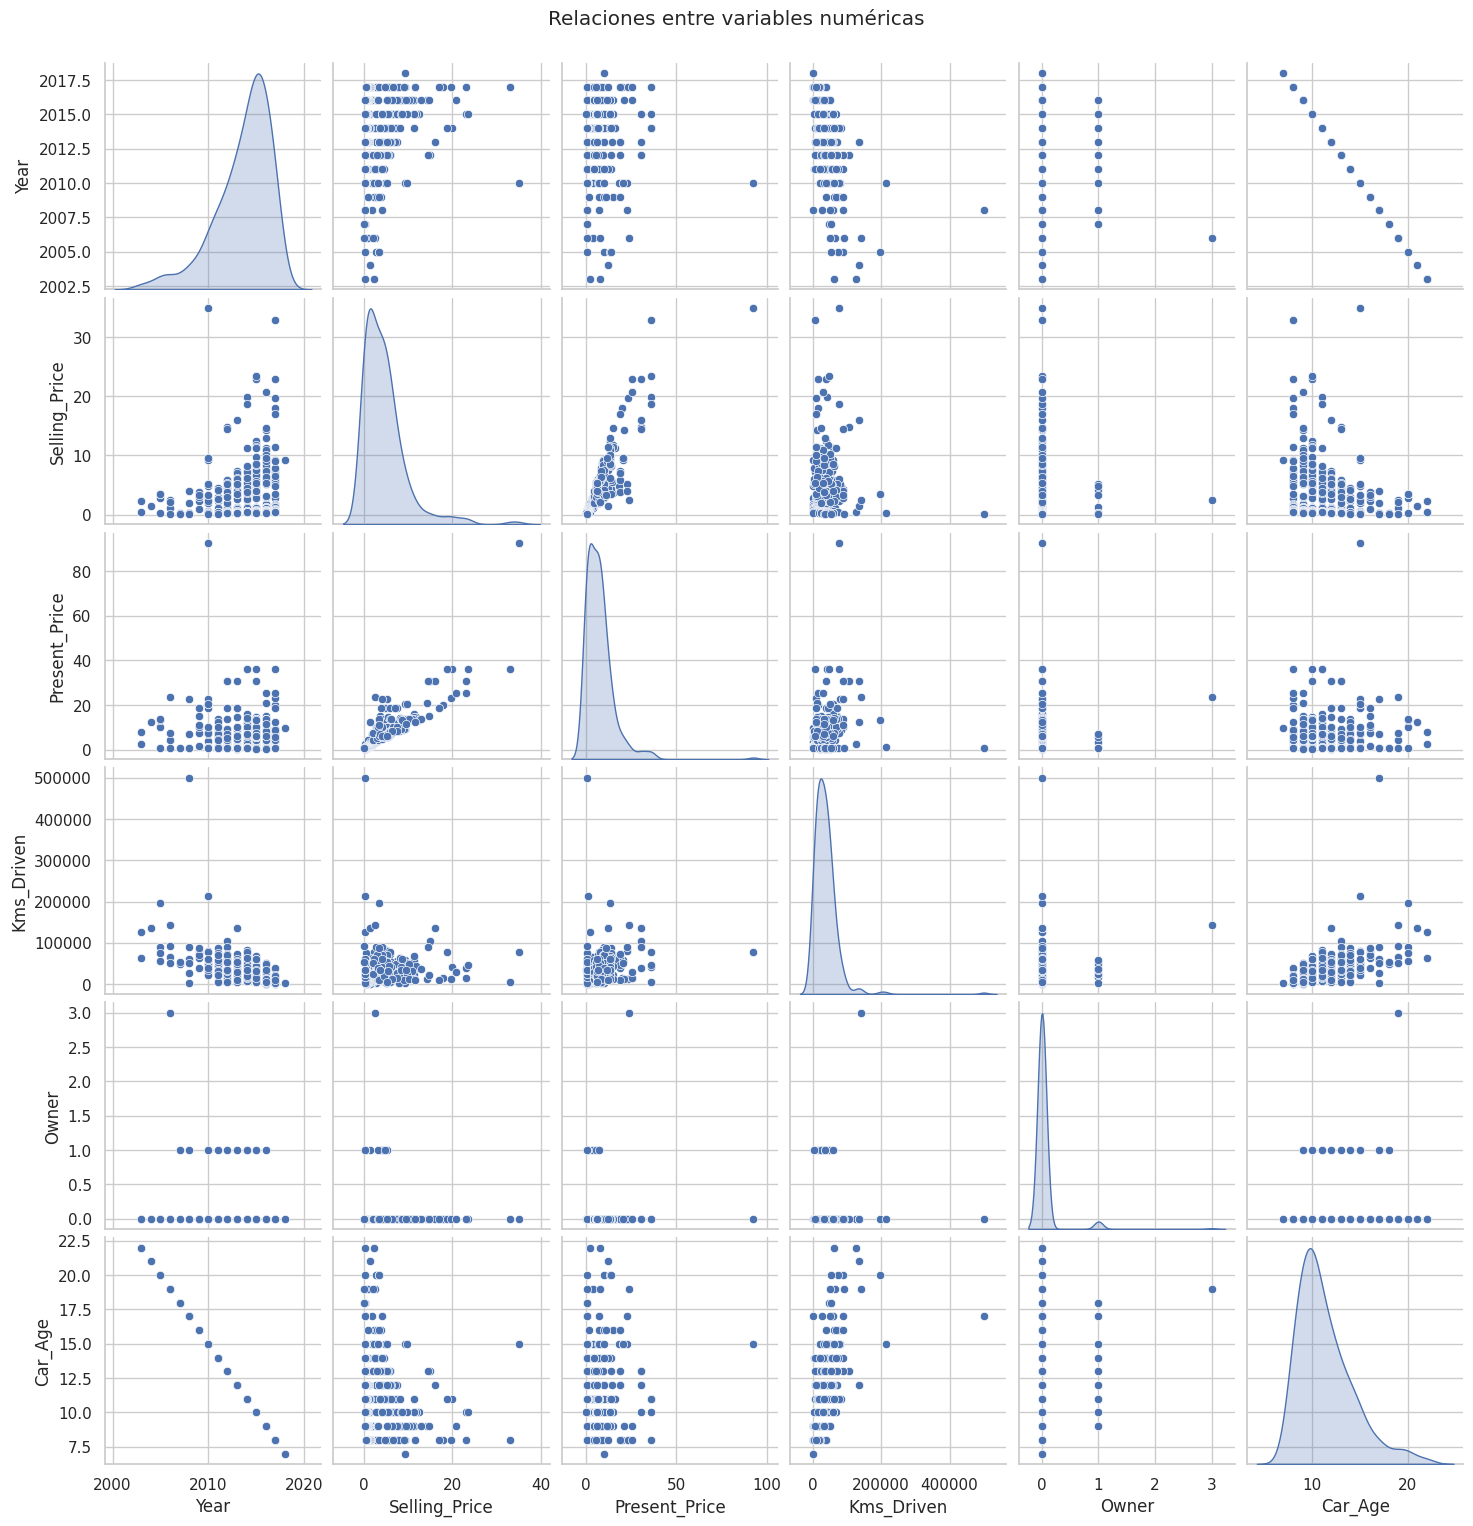

In [41]:
# Realiza un gráfico de pairplot para ver el comportamiento de las variables independientes y la dependiente
### TU CÓDIGO AQUÍ ###
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Relaciones entre variables numéricas', y=1.02)
plt.show()

Escribe tus conclusiones aquí.

Se aprecia una fuerte relación lineal positiva entre Selling_Price y Present_Price, lo que indica que los vehículos con un valor actual más alto en el mercado tienden a venderse también a precios mayores. Esta relación es lógica y confirma que el precio actual es un buen predictor del precio de venta.

Asimismo, se nota una tendencia inversa entre Car_Age y Selling_Price, ya que los autos más antiguos suelen venderse a precios más bajos. En el caso de Kms_Driven, aunque hay cierta dispersión, se observa que los autos con mayor kilometraje tienden a tener precios más bajos, lo que refuerza el efecto del uso en la depreciación. Por otro lado, la variable Owner muestra poca variabilidad y no parece tener una relación clara con el precio de venta. En conjunto, el pairplot confirma que las variables relacionadas con el valor actual, la antigüedad y el uso del vehículo son las más relevantes para explicar el precio de venta.


In [42]:
# Convierte variables categóricas a numéricas para que el modelo las entienda.
# La regresión lineal no puede trabajar con texto ('Petrol', 'Dealer').
# Usaremos One-Hot Encoding con pd.get_dummies() para convertirlas.
# drop_first=True es importante para evitar multicolinealidad perfecta en las variables dummy
### TU CÓDIGO AQUÍ ###
df = pd.get_dummies(df, drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,11,False,True,False,True
1,2013,4.75,9.54,43000,0,12,True,False,False,True
2,2017,7.25,9.85,6900,0,8,False,True,False,True
3,2011,2.85,4.15,5200,0,14,False,True,False,True
4,2014,4.60,6.87,42450,0,11,True,False,False,True


# 4. Construcción y Evaluación del Modelo

In [43]:
# Define tus variables X e y
### TU CÓDIGO AQUÍ ###
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [44]:
# Divide los datos en entrenamiento y prueba (80% / 20%)
### TU CÓDIGO AQUÍ ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Entrena el modelo de Regresión Lineal
### TU CÓDIGO AQUÍ ###
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [46]:
# Realiza predicciones sobre el conjunto de prueba
### TU CÓDIGO AQUÍ ###
y_pred = modelo.predict(X_test)

In [47]:
# Calcula las métricas de evaluación (RMSE y R2) para entrenamiento y prueba y compáralas
### TU CÓDIGO AQUÍ ###
y_train_pred = modelo.predict(X_train)

#Entrenamiento
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

#Prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

# Resultados
print("Desempeño del modelo:")
print(f"Entrenamiento: RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")
print(f"Prueba: RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")

Desempeño del modelo:
Entrenamiento -> RMSE: 1.53, R²: 0.90
Prueba -> RMSE: 2.52, R²: 0.75


# 5. Conclusión para el Cliente

*Escribe un párrafo para los gerentes de 'AutoAnalitica'.*

1. Empieza explicando qué es el RMSE en términos sencillos (ej. "nuestro modelo se equivoca en promedio en..."). Recuerda que el precio en el dataset está en miles de dólares.

El RMSE (Root Mean Squared Error) indica, en términos sencillos, cuánto se equivoca nuestro modelo en promedio al predecir el precio de un automóvil. En este caso, el RMSE en el conjunto de entrenamiento es de aproximadamente 1.53 y en el conjunto de prueba es de 2.52, lo que significa que el modelo se equivoca en promedio entre 1,530 y 2,520 dólares al estimar el precio de venta. Además, el valor de R² de 0.75 en prueba indica que el modelo logra explicar alrededor del 75 por ciento de la variabilidad en los precios reales de los autos.


2. Termina dando tu recomendación: ¿Es este modelo lo suficientemente bueno como un primer paso? ¿Para qué podría ser útil?

Estos resultados muestran que, aunque el modelo aún puede mejorarse, tiene un desempeño sólido como punto de partida. Sí, este modelo puede considerarse lo suficientemente bueno como un primer paso. Logra capturar una parte importante de la variabilidad en los precios de venta y ofrece un punto de referencia cuantitativo que supera las estimaciones puramente intuitivas de los vendedores. Aunque no es perfecto, permite reducir la subjetividad en el proceso de tasación y brindar precios más consistentes y razonables según las características del vehículo.

En esta etapa, el modelo puede ser útil como una herramienta de apoyo para los agentes de ventas, ayudándolos a definir un rango de precios inicial antes de negociar con el cliente. También puede servir para detectar casos donde el precio estimado por el modelo difiere mucho del ofrecido, lo que alertaría sobre posibles errores o vehículos con condiciones especiales. Con futuras mejoras, el sistema podría integrarse directamente en las plataformas de cotización o en el proceso de compra de autos usados para automatizar la valoración inicial.